In [1]:
from ROOT import TTree, TFile
from utils.ComputeMVA import ComputeMVA

Welcome to ROOTaaS 6.06/00


In [2]:
my_file = TFile("./b-tagging_ntuple/qq_ILD_spIP/analyzers.ZqqIPJetsTreeProducer.ZqqIPJetsTreeProducer_1/tree.root","OPEN")
my_tree = my_file.Get("events")

variables = ["jet_logbtag", "jet_m_inv_signif_larger3", "jet_n_signif_larger3", "jet_angle_wrt_jet_dir_larger3"]

aux_file = TFile("./aux_tree.root", "RECREATE") # it is required by ROOT
my_mva = ComputeMVA(variables, 
                    my_tree.CopyTree("quark_type <= 4"), 
                    my_tree.CopyTree("quark_type == 5") )

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


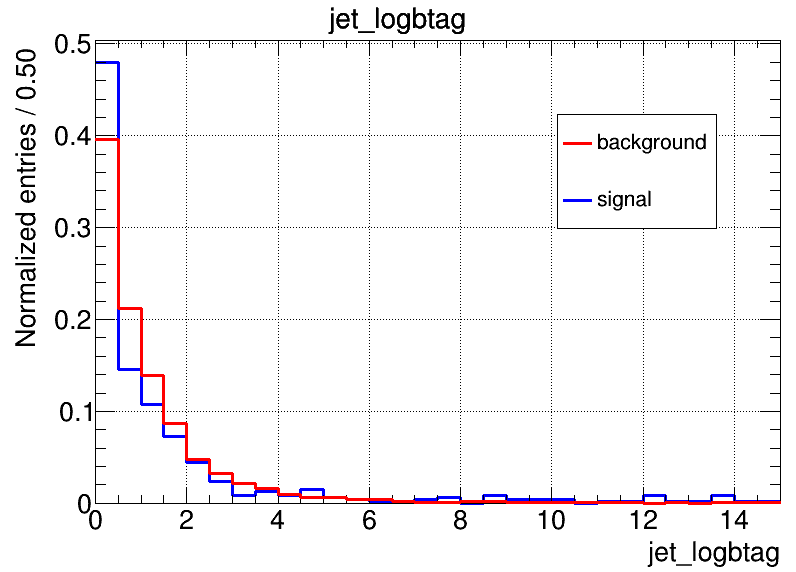

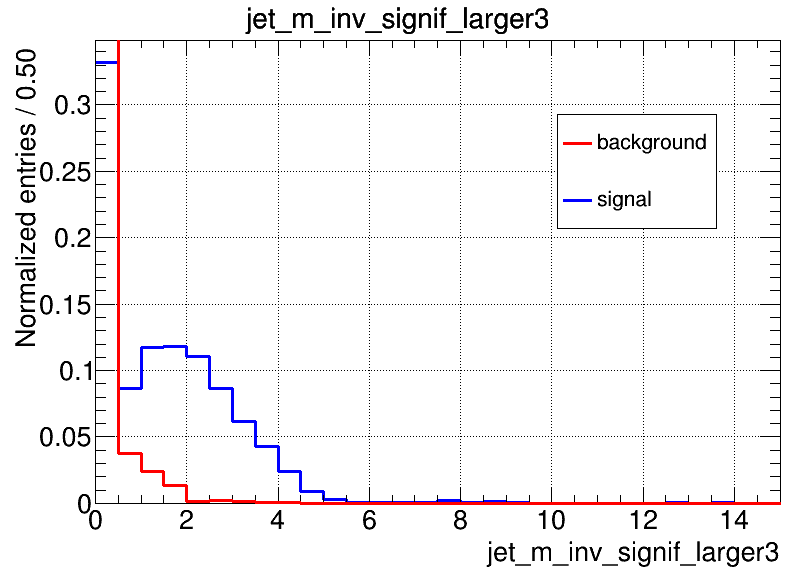

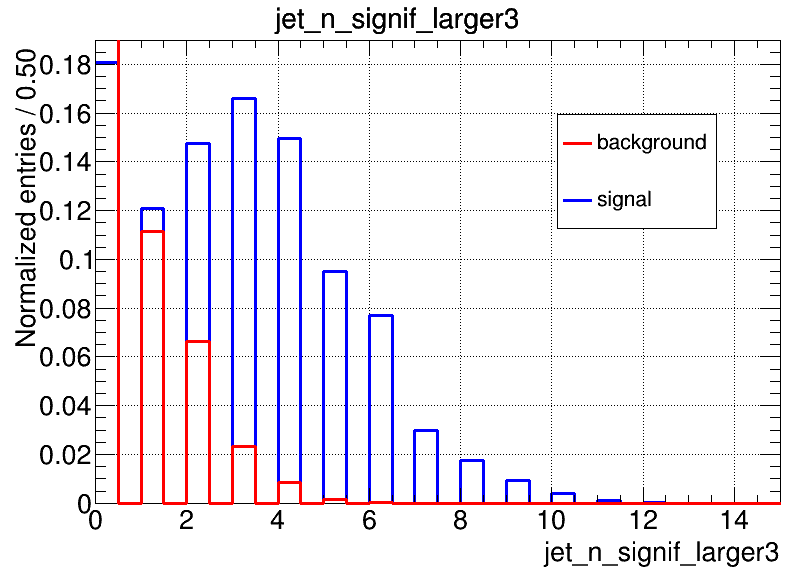

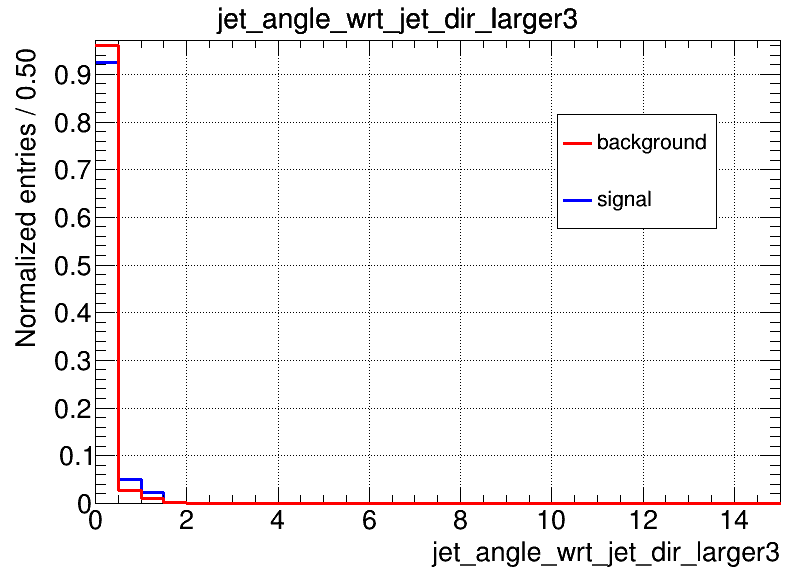

In [3]:
my_mva.DrawRawVariables()
for canvas in my_mva.raw_variables_canvases:
    canvas.Draw()

In [4]:
my_mva.Training()

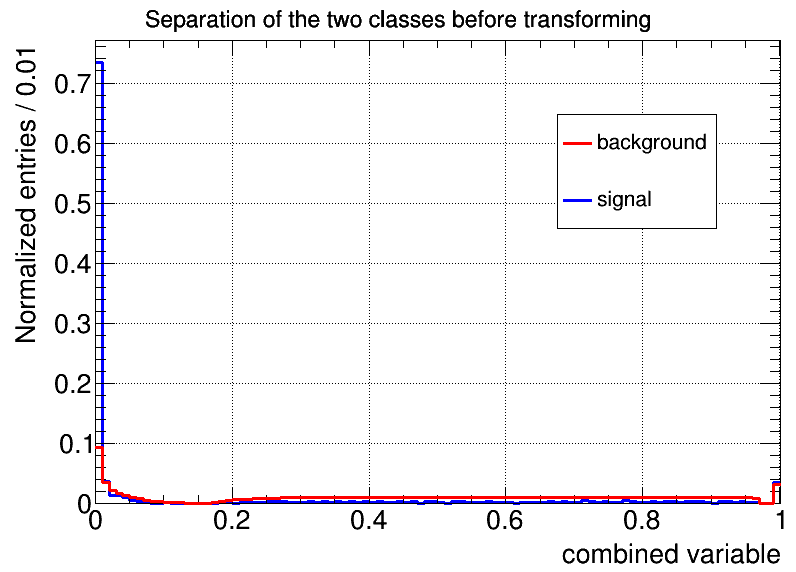

In [5]:
my_mva.Draw(my_mva.discriminating_tree, "before_transf", "Separation of the two classes before transforming", "combined variable", 100)
my_mva.canvases[-1].Draw()

In [6]:
my_mva.Transform()

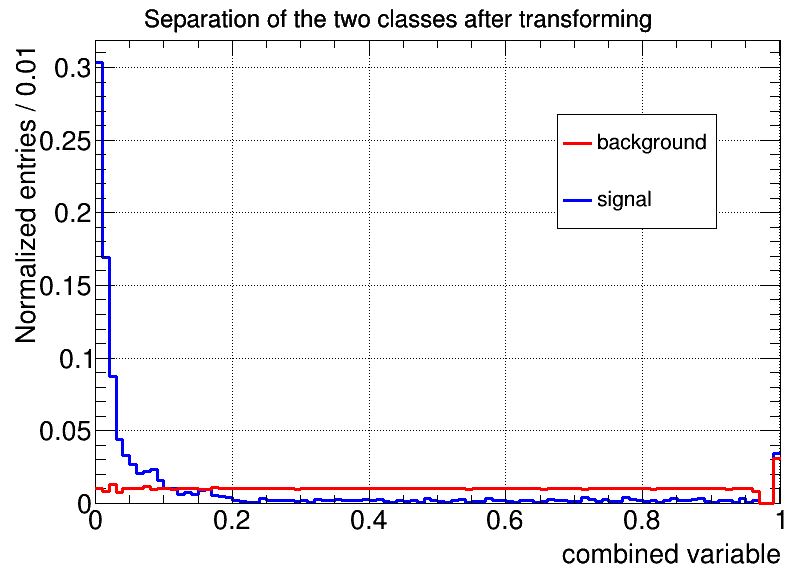

In [7]:
my_mva.Draw(my_mva.transformed_discriminating_tree, "after_transf", "Separation of the two classes after transforming", "combined variable", 100)
my_mva.canvases[-1].Draw()

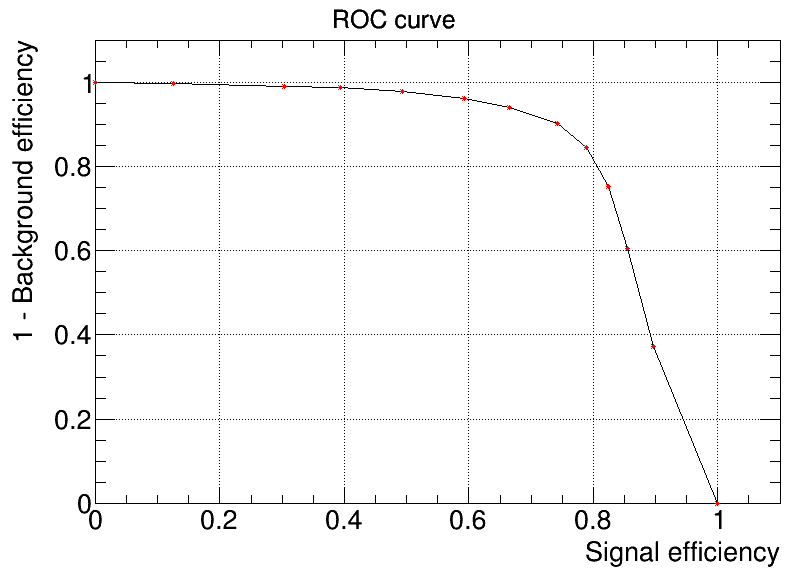

In [8]:
my_mva.RocCurve(my_mva.transformed_discriminating_tree, "after_transf", "")
my_mva.canvases[-1].Draw()